# Note for model v0.4

In [1]:
import sys
sys.path.append('../src/models') 
sys.path.append('../src/data') 
from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.models import Model

In [2]:
from model1.dataloader import load_data
from model1.model_v0_4 import ContentBasedFiltering

In [3]:
train_dataset, cv_dataset, test_dataset, info = load_data(sample_train= 0.05, feature_info=True)

loading	 train_dataset
loaded:	 train_dataset
loading	 cv_dataset
loaded:	 cv_dataset
loading	 test_dataset
loaded:	 test_dataset
train_dataset: 5549 examples
cv_dataset: 12140 examples
test_dataset: 12747 examples


In [4]:
batch_size = 32

train_dataset = train_dataset.shuffle(buffer_size=len(train_dataset))
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [5]:
cv_dataset = cv_dataset.batch(batch_size)

In [6]:
num_G_features = info['X_group_num_features']
num_T_features = info['X_technique_num_features']

In [7]:
model1 = ContentBasedFiltering (
    num_G_features=num_G_features, 
    num_T_features=num_T_features,
    Group_NN_width = 16,
    Group_NN_depth = 3,
    Technique_NN_width = 16,
    Technique_NN_depth = 3,)

(None, 463)
(None, 54)
ListWrapper([<KerasTensor: shape=(None, 463) dtype=float32 (created by layer 'input_Group')>, <KerasTensor: shape=(None, 54) dtype=float32 (created by layer 'input_Technique')>])
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dot/Squeeze:0', description="created by layer 'dot'")


In [8]:
model1.summary()

Model: "content_based_filtering"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Group_NN (Sequential)       (None, 32)                8512      
                                                                 
 Technique_NN (Sequential)   (None, 32)                1968      
                                                                 
Total params: 10,480
Trainable params: 10,480
Non-trainable params: 0
_________________________________________________________________


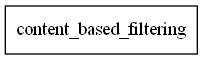

In [12]:
keras.utils.plot_model (model1, to_file='delete-me.png')
# model1.Technique_NN.summary()

In [10]:
epochs = 5
history = model1.fit (
    train_dataset,
    validation_data = cv_dataset,
    epochs= epochs
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
test_dataset = test_dataset.batch(batch_size)

loss, accuracy = model1.evaluate (test_dataset)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.